In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification
import pandas as pd

In [16]:
db_name = "../nothuge_tw_iqr_gap_UB_diversesfill_diversesfill_smartAEainf_diverses_nonodes_sols_4_3_2_1_components.csv"
df = pd.read_csv(db_name)


char_cols = [
    "n", "m", "density", "planar", "bipartite", "radius", "diameter", "node_connectivity", "transitivity", "treewidth",
    "degree_min", "degree_max", "degree_p50", "degree_iqr",
    "closeness_centrality_min", "closeness_centrality_max", "closeness_centrality_p50", "closeness_centrality_iqr",
    "degree_centrality_min", "degree_centrality_max", "degree_centrality_p50", "degree_centrality_iqr",
    "clustering_min", "clustering_max", "clustering_p50", "clustering_iqr",
    "katz_centrality_min", "katz_centrality_max", "katz_centrality_p50", "katz_centrality_iqr",
    "pagerank_min", "pagerank_max", "pagerank_p50", "pagerank_iqr"
]

X = df[char_cols]
y = df["best_solver"]

In [9]:
print(y.unique())

['diverses' 'remove_edges_FAS_greedy'
 'remove_edges_trueskill_scc_iteratively'
 'remove_edges_pagerank_scc_iteratively' 'smartAE_ainf']


In [23]:


# Generate a random classification dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Define scoring metrics
# scoring = {
#     'accuracy_macro': make_scorer(accuracy_score,average='macro'),
#     'precision_macro': make_scorer(precision_score,average='macro'),
#     'recall_macro': make_scorer(recall_score,average='macro')
# }

# Perform cross-validation
# cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)


# # Get the mean scores for each metric
# accuracy = np.mean(cv_results['test_accuracy'])
# precision = np.mean(cv_results['test_precision'])
# recall = np.mean(cv_results['test_recall'])

# print(f'Accuracy: {accuracy:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')

cv_score = cross_val_score(clf, X, y,scoring="accuracy")
print(np.mean(cv_score))



# cv_score = cross_val_score(clf, X, y,scoring="precision")
# print(cv_score)

# cv_score = cross_val_score(clf, X, y,scoring="recall")
# print(cv_score)




0.9319916142557652


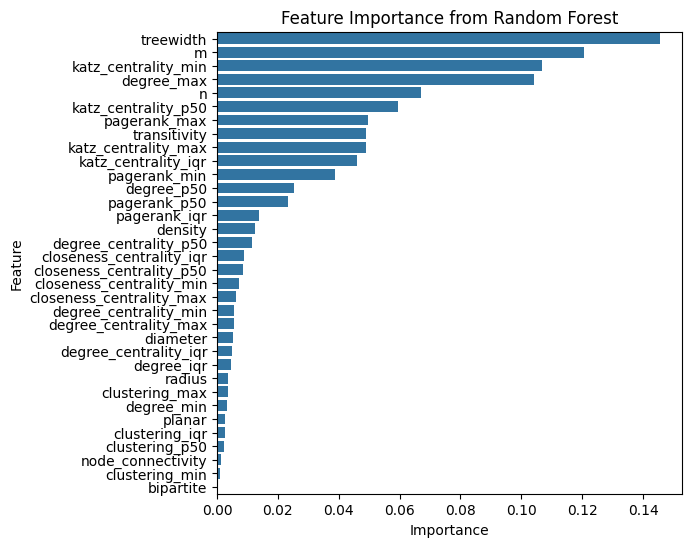

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Example DataFrame
# df = pd.DataFrame({
#     'feature1': np.random.rand(100),
#     'feature2': np.random.rand(100),
#     'feature3': np.random.rand(100),
#     'target': np.random.randint(0, 2, 100)
# })

# X = df[['feature1', 'feature2', 'feature3']]
# y = df['target']







# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


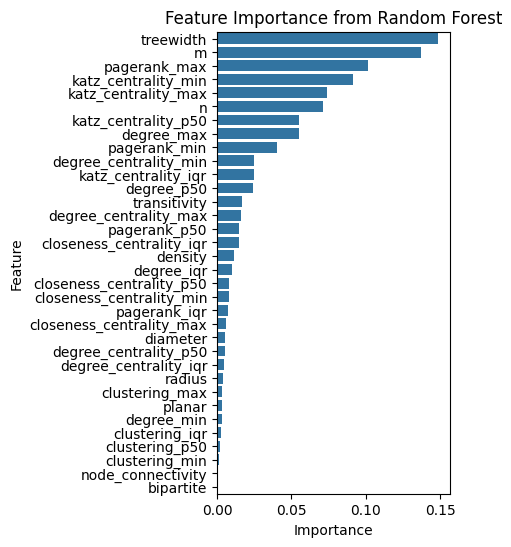

In [18]:
plt.figure(figsize=(3, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

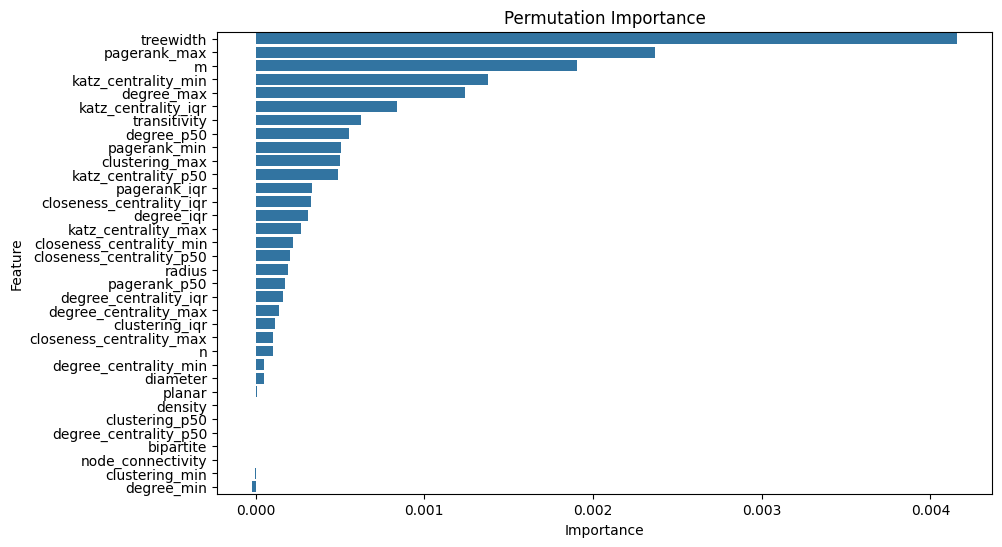

In [7]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X, y, n_repeats=30, random_state=0)

# Create a DataFrame for better visualization
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()


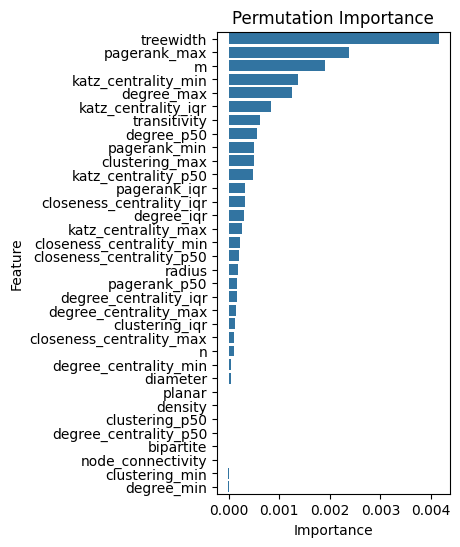

In [17]:
plt.figure(figsize=(3, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()

In [1]:
# import shap

# # Initialize the explainer
# explainer = shap.TreeExplainer(model)

# # Calculate SHAP values
# shap_values = explainer.shap_values(X)

# # Summary plot
# shap.summary_plot(shap_values, X)

# # Mean absolute SHAP value for each feature
# shap_df = pd.DataFrame({
#     'Feature': X.columns,
#     'SHAP Importance': np.mean(np.abs(shap_values), axis=0)
# }).sort_values(by='SHAP Importance', ascending=False)

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.barplot(x='SHAP Importance', y='Feature', data=shap_df)
# plt.title('SHAP Feature Importance')
# plt.show()


In [2]:
# from lime import lime_tabular

# # Initialize the explainer
# explainer = lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns, class_names=['Class 0', 'Class 1'], discretize_continuous=True)

# # Explain a single prediction
# exp = explainer.explain_instance(X.iloc[0].values, model.predict_proba, num_features=5)

# # Show explanation in a notebook
# exp.show_in_notebook(show_table=True)

# # Plot the explanation
# exp.as_pyplot_figure()
# plt.show()


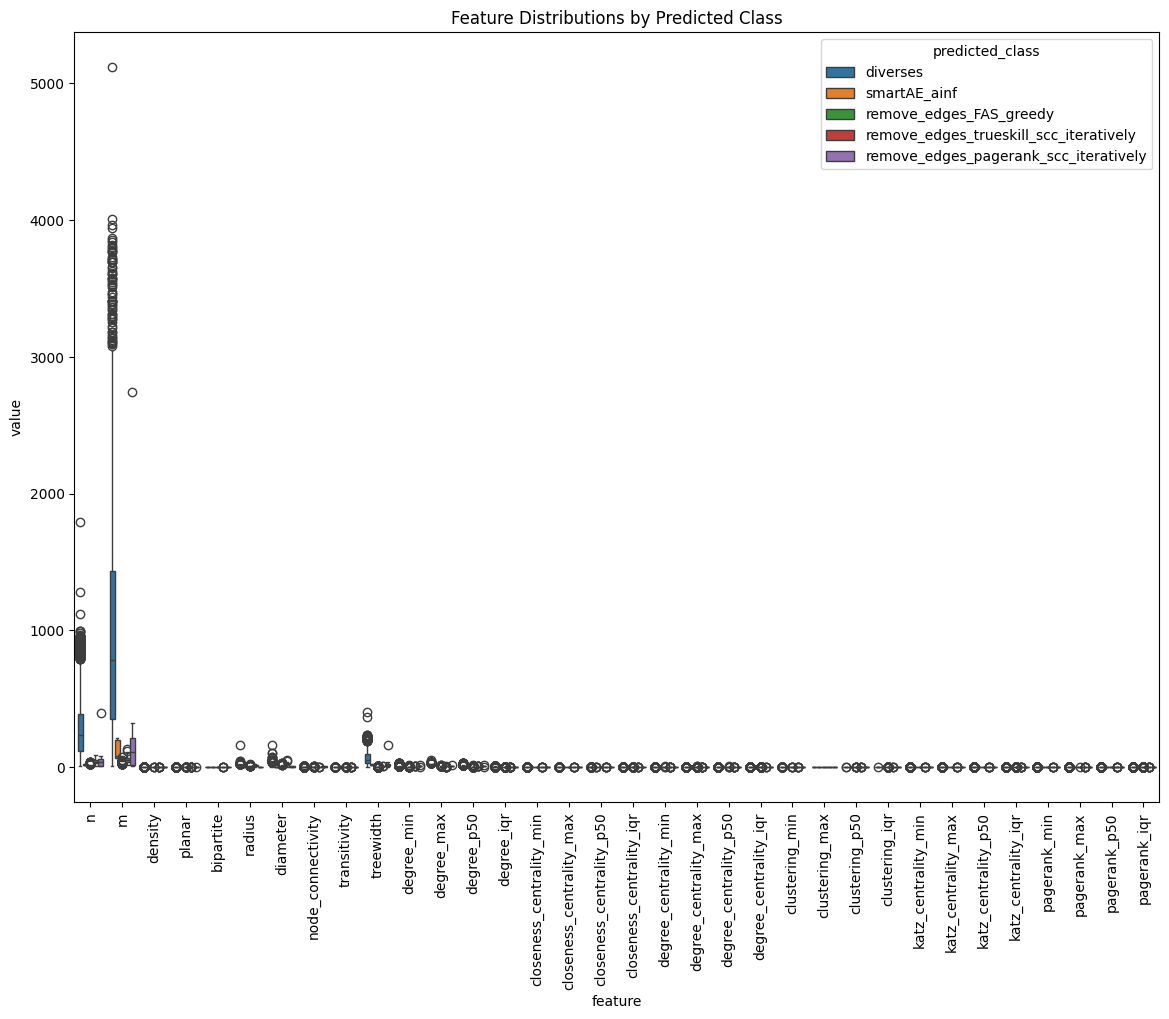

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# # Load sample data (Iris dataset for demonstration)
# data = load_iris()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = data.target

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Train the random forest classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)



# Predict probabilities
y_pred_proba = rf.predict_proba(X_test)

# Convert to a DataFrame
prob_df = pd.DataFrame(y_pred_proba, columns=[f'class_{i}_proba' for i in range(len(y.unique()))])
prob_df['predicted_class'] = rf.predict(X_test)
prob_df['true_class'] = y_test

# Add feature columns to the DataFrame
prob_df = pd.concat([prob_df, X_test.reset_index(drop=True)], axis=1)

# Melt the DataFrame for seaborn visualization
melted_df = prob_df.melt(id_vars=['predicted_class', 'true_class'], value_vars=X.columns, var_name='feature', value_name='value')

# Plot the distribution of each feature for each predicted class
plt.figure(figsize=(14, 10))
sns.boxplot(data=melted_df, x='feature', y='value', hue='predicted_class')
plt.title('Feature Distributions by Predicted Class')
plt.xticks(rotation=90)
plt.show()


In [7]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
image = imread('../images/feat_imp.png')

In [10]:
image.shape

(547, 511, 4)

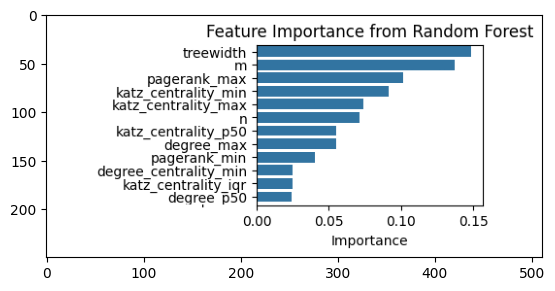

In [32]:
trans_y = 189
padd = 7
down_y = 493
image2_p1 = image[:trans_y + padd, :]
image2_p2 = image[down_y:, :]
image2 = np.concatenate([image2_p1, image2_p2], axis=0)
plt.imshow(image2)
plt.imsave('../images/feat_imp2.png', image2)

(547, 460, 4)


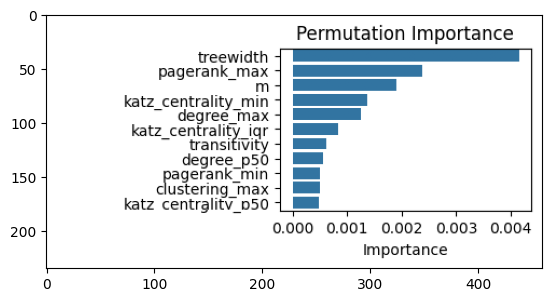

In [37]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
image = imread('../images/permut_imp.png')

print(image.shape)

trans_y = 174
padd = 7
down_y = 493
image2_p1 = image[:trans_y + padd, :]
image2_p2 = image[down_y:, :]
image2 = np.concatenate([image2_p1, image2_p2], axis=0)
plt.imshow(image2)
plt.imsave('../images/permut_imp2.png', image2)

print(type(image))
plt.imshow(image)